In [1]:
## loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading dataset
df1=pd.read_csv("data.csv")

In [3]:
## first 5 rows
df1.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [4]:
## checking the data types of each columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
Gender              28 non-null object
Test preparation    28 non-null object
Total Marks         28 non-null int64
dtypes: int64(1), object(2)
memory usage: 752.0+ bytes


In [5]:
df1.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

##### No NULL values 

In [6]:
## statistic analysis of "Total Marks"
df1.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [7]:
## unique values in 'Test preparation'
df1['Test preparation'].unique()

array(['none', 'completed'], dtype=object)

In [8]:
## gender distribution in the dataset
df1['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

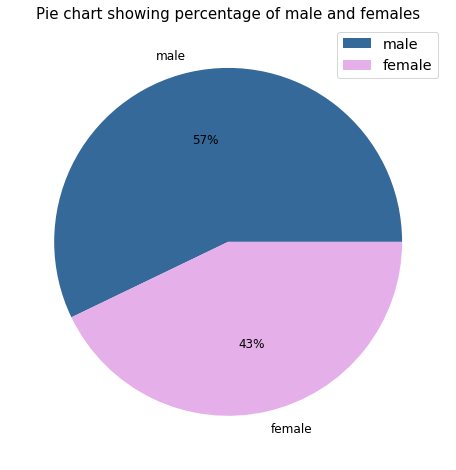

In [9]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8,8))
plt.title("Pie chart showing percentage of male and females",fontsize=15)
colors = ['#34699A','#E5B0EA']
plt.pie(df1['Gender'].value_counts(), labels = df1['Gender'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(df1['Gender'].unique(),loc="upper right",fontsize='large')
plt.show()

#### 14 % more Male students than females.

In [10]:
## average marks of female and male
df1.groupby("Gender").mean()

,Total Marks
Gender,
female,33.750000
male,30.416667


In [11]:
## std deviation
df1.groupby("Gender").std()

,Total Marks
Gender,
female,12.865976
male,12.168950


Gender
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

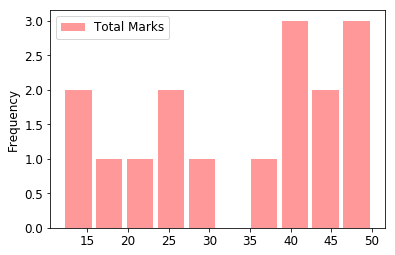

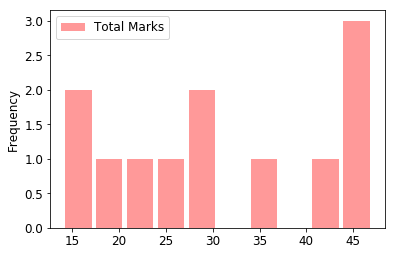

In [12]:
## distibution of marks for males and females
df1.groupby('Gender').plot(kind='hist',rwidth=0.85,color=["#FF9999","#5584AC"])

##### From above graphs we can say that:<br>
<ul>
    <li><b>Most of females scores above 40</b></li>
    <li><b>Negative skewness is observed in both cases</b></li>
</ul>

Text(0.5, 0, 'Marks')

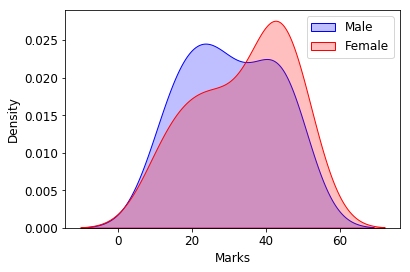

In [13]:
# Plotting the KDE Plot
sns.kdeplot(df1.loc[(df1['Gender']=='male'),
            'Total Marks'], color='b', shade=True, Label='Male')
sns.kdeplot(df1.loc[(df1['Gender']=='female'), 
            'Total Marks'], color='r', shade=True, Label='Female')
plt.legend()
plt.xlabel('Marks')

In [14]:
## grouping based on both gender and Test preparation
df1.groupby(["Gender","Test preparation"]).count()

Total Marks
Gender Test preparation             
female completed                   4
       none                       12
male   completed                   3
       none                        9

In [15]:
## grouping based on both gender and Test preparation and their correspoding mean is observed.
df1.groupby(["Gender","Test preparation"]).mean()

Total Marks
Gender Test preparation             
female completed           45.250000
       none                29.916667
male   completed           43.666667
       none                26.000000

##### From above table we can say:
<ul>
    <li><b>'completed' test preparation has resulted in scoring avg 45 marks for females and avg 43 marks for males</b></li>
    <li><b>'none' test preparation has resulted in scoring only avg 29 marks for females and avg 26 marks for males</b></li>
</ul>

##### From above we can say that the test preparation has helped students to get high marks.
##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Null hypothesis = Female and male students does score same marks.
##### Alternate hypothesis = Female and male students does not score same marks.

In [16]:
## creating subsets
male=df1[df1['Gender']=='male']['Total Marks']
female=df1[df1['Gender']=='female']['Total Marks']

In [17]:
## checking for normalization
from scipy.stats import shapiro
shapiro(male)
## This tuple contains the test statistics and the p-value. Here, the null hypothesis is that the data follows a normal distribution. 
## Thus, we can infer that the data from both groups is normally distributed.
## p value > 0.05 , so cant reject null hypothesis

(0.9093747138977051, 0.20944461226463318)

In [18]:
shapiro(female)
## p value > 0.05 , so cant reject null hypothesis

(0.9078445434570312, 0.10742566734552383)

In [19]:
## Checking the Homogeneity of Variances Assumption in Python
##  the variances in the two groups are equal is our NULL hypothesis
from scipy.stats import levene
levene(male, female)
## p value > 0.05 therefore we cannot reject the NULL hypothesis

LeveneResult(statistic=0.030377528418080474, pvalue=0.8629864171846633)

In [20]:
from scipy.stats import ttest_ind
res = ttest_ind(male, female, 
                      equal_var=True)

display(res)
## p value > 0.05 therefore our NULL hypothesis cant be neglected.

Ttest_indResult(statistic=-0.6940885268848668, pvalue=0.4937822317960763)

##### p value = 0.4937822317960763
##### As the p value is greather than 0.05 , we cannot reject the Null hypothesis which states ,Female and male students does score same marks.
##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Null hypothesis = The test preparation does not help the students.
#### Alterante hypothesis = The test preparation does help the students.

In [21]:
## taking subsets
none=df1[df1['Test preparation']=='none']['Total Marks']
completed=df1[df1['Test preparation']=='completed']['Total Marks']

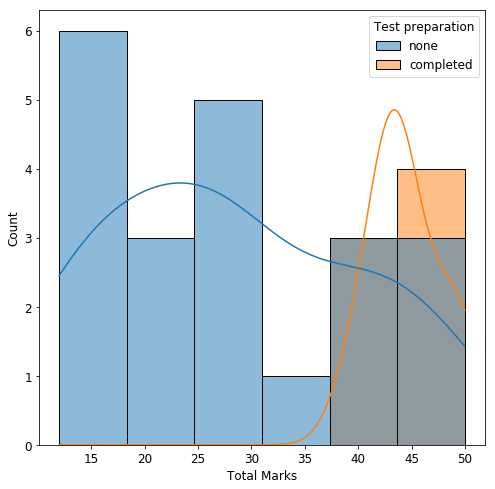

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(data=df1, x="Total Marks", hue="Test preparation", kde=True)

##### From figure :
<ul>
    <li><b>Those who had completed test preparation scores above 40.</b></li>
    <li><b>Lowest scores are scored by students who have no test preparation.</b></li>
    <li><b>Most of the students doesnt have any test test preparation.</b></li>
    <li><b>A few students got higher marks without any preparation.</b></li>
</ul>

Text(0.5, 0, 'Marks')

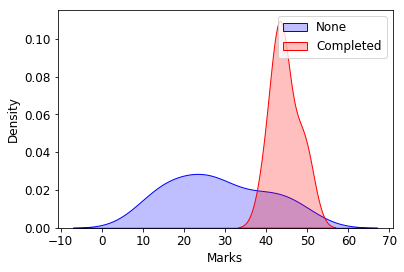

In [23]:
# Plotting the KDE Plot
sns.kdeplot(df1.loc[(df1['Test preparation']=='none'),
            'Total Marks'], color='b', shade=True, Label='None')
sns.kdeplot(df1.loc[(df1['Test preparation']=='completed'), 
            'Total Marks'], color='r', shade=True, Label='Completed')
plt.legend()
plt.xlabel('Marks')

In [24]:
shapiro(none)
## Here, the null hypothesis is that the data follows a normal distribution.
## p value > 0.05 , they are normalized

(0.935218095779419, 0.17507188022136688)

In [25]:
shapiro(completed)
## Here, the null hypothesis is that the data follows a normal distribution.
## p value > 0.05 , they are normalized

(0.9187047481536865, 0.4593968093395233)

In [26]:
levene(none, completed)
## the variances in the two groups are equal is our NULL hypothesis
## p value < 0.05 , they are not homogeneous

LeveneResult(statistic=7.5816485225505446, pvalue=0.01061297110643562)

In [27]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(none, completed)
## p value= 0.001267 < 0.05 therefore therefore we can neglect our NULL hypothesis which state that the test preperation does not helped

(-3.6143637527769226, 0.0012671292457320106, 26.0)

##### p value =  0.0012671292457320106
##### As the p value is < 0.05 , the Null hypothesis is rejected , so we can say that the test preparartion has helped students. Alternate hypothesis is accepted.